In [1]:
%pylab inline
%run visualizations.ipynb
import sys
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
from tracking import HoughSpace
from scipy import sparse
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick
from hits import CyDetHits, CTHHits, CDCHits
from cylinder import CyDet

# Import RECBE Wiring

In [3]:
import root_numpy
from pprint import pprint
from pandas import DataFrame

In [4]:
recbe_wiring_file = "/home/elg112/ICEDUST_old/track_finding_standalone/"+\
                    "track_finding_yandex/data/chanmap_20160814.root"

In [5]:
pprint(root_numpy.list_structures(recbe_wiring_file))

OrderedDict([('LayerLength', [('LayerLength', u'double')]), ('layer', [('layer', u'int')]), ('wire', [('wire', u'int')]), ('xhv', [('xhv', u'double')]), ('yhv', [('yhv', u'double')]), ('x0', [('x0', u'double')]), ('y0', [('y0', u'double')]), ('xro', [('xro', u'double')]), ('yro', [('yro', u'double')]), ('LayerID', [('LayerID', u'int')]), ('isSenseWire', [('isSenseWire', u'int')]), ('CellID', [('CellID', u'int')]), ('BoardID', [('BoardID', u'int')]), ('BrdLayID', [('BrdLayID', u'int')]), ('BrdLocID', [('BrdLocID', u'int')]), ('ChanID', [('ChanID', u'int')])])


In [6]:
root_numpy.list_branches(recbe_wiring_file)

['LayerLength',
 'layer',
 'wire',
 'xhv',
 'yhv',
 'x0',
 'y0',
 'xro',
 'yro',
 'LayerID',
 'isSenseWire',
 'CellID',
 'BoardID',
 'BrdLayID',
 'BrdLocID',
 'ChanID']

In [7]:
root_numpy.list_trees(recbe_wiring_file)

['t']

In [176]:
recbe_positions = root_numpy.root2array(recbe_wiring_file, selection="isSenseWire == 1 && LayerID > 0 && LayerID < 19", 
                                        branches=["LayerID", "CellID","BoardID",
                                                  "BrdLayID", "BrdLocID","ChanID"])

In [177]:
rbdf = DataFrame(recbe_positions).sort_values(by=["LayerID", "CellID"])
rbdf

,LayerID,CellID,BoardID,BrdLayID,BrdLocID,ChanID
0,1,0,0,0,0,2
1,1,1,0,0,0,1
2,1,2,0,0,0,3
3,1,3,0,0,0,14
4,1,4,0,0,0,21
5,1,5,0,0,0,23
6,1,6,0,0,0,24
7,1,7,0,0,0,26
8,1,8,0,0,0,29
9,1,9,0,0,0,41


## Check Correspondence

In [178]:
cydet_geom = CyDet(projection=0.0)

In [179]:
print "[",
counter = 0
for value in cydet_geom.phi0_by_layer - np.pi:
    print "{0:08f}".format(value)+",",
    counter += 1
    if counter % 2 == 0:
        print "\n ",
print "]"

[ 0.015867, 0.015400, 
  0.000000, 0.014543, 
  0.000000, 0.000001, 
  0.013427, 0.000000, 
  0.012771, 0.000000, 
  0.012176, 0.000000, 
  0.011636, 0.000001, 
  0.000000, 0.000000, 
  0.010686, 0.000000, 
  ]


In [180]:
layer_id = 1
#recbe_wires = recbe_positions[np.where(recbe_positions["LayerID"] == layer_id+1)]

In [181]:
pprint(zip(recbe_layers, recbe_cells))


[(16, 278),
 (16, 279),
 (16, 280),
 (16, 281),
 (16, 282),
 (16, 283),
 (16, 284),
 (16, 285),
 (16, 286),
 (16, 287),
 (16, 288),
 (16, 289),
 (16, 290),
 (16, 291),
 (16, 292),
 (16, 293),
 (17, 284),
 (17, 285),
 (17, 286),
 (17, 287),
 (17, 288),
 (17, 289),
 (17, 290),
 (17, 291),
 (17, 292),
 (17, 293),
 (17, 294),
 (17, 295),
 (17, 296),
 (17, 297),
 (17, 298),
 (17, 299)]


In [182]:
print recbe_wires.shape

(32,)


In [183]:
y_pos_recbe = -recbe_wires["yro"]/10.
x_pos_recbe = -recbe_wires["xro"]/10.

ValueError: no field of name yro

In [184]:
#layer_point_ids = [ids for lay in range(18) for ids in cydet_geom.point_lookup[lay][recbe_wires["CellID"]] if ids != -1]

In [185]:
x_pos_cdc, y_pos_cdc = cydet_geom.get_points_xs_and_ys()

In [195]:
all_colour = np.linspace(0,1,104)
np.random.shuffle(all_colour)

In [196]:
import matplotlib.cm as cm


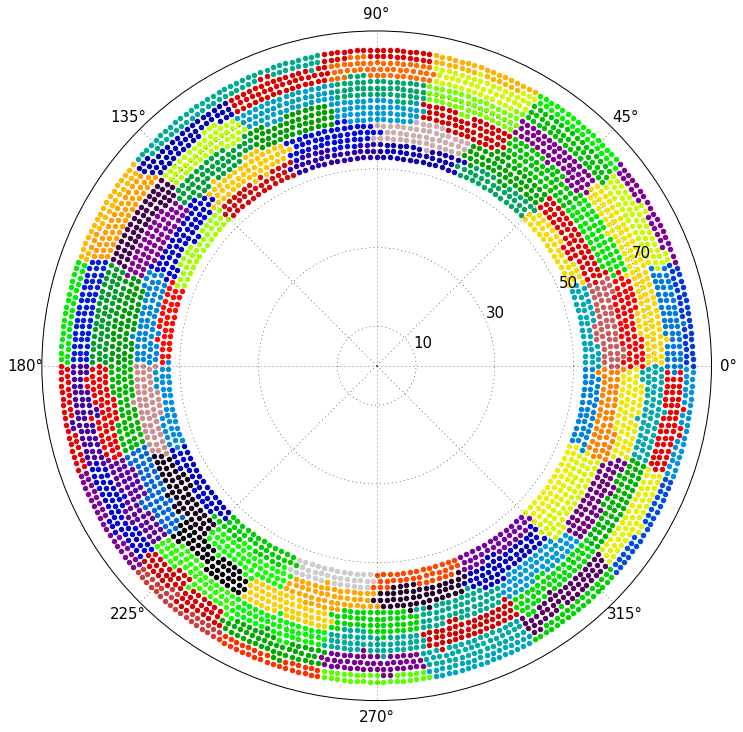

In [197]:
plot_output(np.zeros(cydet_geom.n_points), cydet_geom)
plot_colors = iter(cm.nipy_spectral(all_colour))
for board_id in range(104):
#plt.scatter(x_pos_recbe, y_pos_recbe, s=4, transform=gca().transData._b, color="blue")
    recbe_wires = recbe_positions[np.where( (recbe_positions["BoardID"] == board_id))]
    recbe_layers = recbe_wires["LayerID"] - 1
    recbe_cells = recbe_wires["CellID"]
    board_point_ids = cydet_geom.point_lookup[recbe_layers,recbe_cells]
    plt.scatter(x_pos_cdc[board_point_ids], y_pos_cdc[board_point_ids], s=20, 
                color=next(plot_colors),
                transform=gca().transData._b)